### Background

This is data taken from Kaggle. Data can be obtained from here: https://www.kaggle.com/xvivancos/barcelona-data-sets

In [1]:
Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import folium
from matplotlib.lines import Line2D
%matplotlib inline

In [31]:
accidents = pd.read_csv('../Data/accidents_2017.csv')
accidents.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


Total number of people Died or Injured : 24360


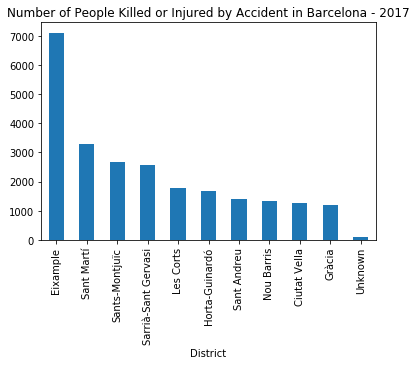

In [56]:
print("Total number of people Died or Injured : {}".format(accidents['killed+injured'].sum()))
accidents['killed+injured'] = accidents['Mild injuries'] + accidents['Serious injuries'] + accidents['Victims']
accidents.groupby(['District Name'])['killed+injured'].sum().sort_values(axis=0, ascending=False).plot(kind='bar')
plt.xlabel('District')
plt.title('Number of People Killed or Injured by Accident in Barcelona - 2017')
plt.show()

### Experimental Hypothesis

Barcelona roads are deadly. In 2017, 24360 people died or injured in traffic accidents in the Barcelona out of 7000 were in Eixample only. The addition of safety features such as seat belts and air bags have reduced the number of deaths, and new technology from autonomous vehicles could help even more as driver error is eliminated. Researchers estimated that fully autonomous vehicles, also known as self-driving cars, could reduce traffic fatalities by eliminating  accidents that are due to human error. 

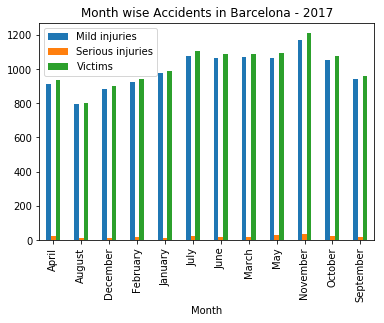

In [28]:
accidents.groupby(['Month']).\
        agg({'Mild injuries':'sum', 'Serious injuries':'sum','Victims':'sum'}).plot(kind='bar')
plt.xlabel('Month')
plt.title('Month wise Accidents in Barcelona - 2017')
plt.show()

<Figure size 1080x720 with 0 Axes>

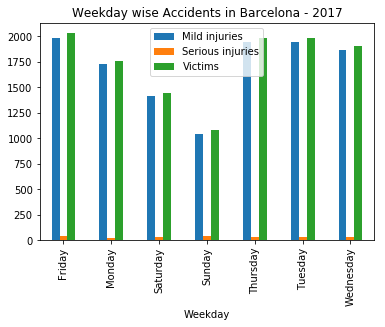

In [25]:
accidents.groupby(['Weekday']).\
        agg({'Mild injuries':'sum', 'Serious injuries':'sum','Victims':'sum'}).plot(kind='bar')
plt.xlabel('Weekday')
plt.title('Weekday wise Accidents in Barcelona - 2017')
plt.show()

### Analysis

In 2017, majority of accidents occured in the month of November on Friday where the least number of accidents occured in the month of August on Sunday. 

### Role out plan

The plan will be to run self-driving vehicals in Eixample starting from November. The variable of interest is whether or not those fully autonomous vehicles helps in reduction of accidents. This is an A/B test for accidents in Eixample only.

We should run the experiment for 4 months with the expecation that the data gathering will take 6 months. Results will be finalized after the conclusion of the 6 month window.

### Evaluation plan

Initially, one thousand people in Eixample will be randamly selected who have self-driving vehical. Other one thousand people will also be selected randmly who have non autonomous vehicle. Two thousand people as sample size is choosen in order to increase the validity of the A/B and A/A testing. Randomly selecting individuals will control for selection bias, and that way I will have a meaningful sample size that isn’t skewed.

The accidents data during that period of time will be continuosly analyzed during the experiment. The mean result of number of accidents before and after using autonomous vehicles will be compared. To be cautious, median and standard deviation of each metric will also be considered as to make sure that the mean is the best option to use as a benchmark.

Not all participants selected may want to participate hence fifteen hundred people will be polled before providing vehicles and ask them about there interest towards participation. If a lot of participants from a particular age range, or ethnicity, or gender, or socioeconomic status are missing, I will purposefully search for that missing category, but if all things are equal, I will randomly select someone until I have all the participants I need to conduct my study.

Selected thousand people will use self-driving vehicals during experiment and other thousand will use non autonomous vehicle. At the end of the experiment, results will be compared with befor self-driving vehical accident reports. I will also take a look at participants initial health report and their end of the year health report too.

Success in this experiment will give us good data to work with and help us answer our hypothesis.
If significant decrease in number of accidents is not noticed, the hypothesis is wrong. Then it can be concluded that fully autonomus vehicles does not help in reducing accidents. 